# Import Libraries

In [114]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


# 1-import Data


In [115]:
taxi_jan_2019 = pd.read_parquet('yellow_tripdata_2019-01.parquet')

# To add new data in the future
taxi_db = pd.concat([taxi_jan_2019])



# Data exploration

In [116]:
#Print the shape
print(taxi_db.shape)
taxi_db.head()

(7696617, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


In [117]:
#chicking the missing values
print(taxi_db.isnull().sum())

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            28672
trip_distance                  0
RatecodeID                 28672
store_and_fwd_flag         28672
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     4884887
airport_fee              7696617
dtype: int64


In [118]:
# Add the usfull columns only

cols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID','PULocationID',
        'DOLocationID', 'payment_type', 'total_amount']

taxi_db=taxi_db[cols]

In [119]:
taxi_db.corr()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
tpep_pickup_datetime,1.000000,0.999996,-0.006372,-0.009875,-0.002294,0.005092,0.004857,-0.020879,-0.000159
tpep_dropoff_datetime,0.999996,1.000000,-0.006345,-0.009550,-0.002235,0.005056,0.004814,-0.020898,-0.000142
passenger_count,-0.006372,-0.006345,1.000000,0.007927,-0.013315,-0.007441,-0.006287,0.009345,-0.000265
trip_distance,-0.009875,-0.009550,0.007927,1.000000,0.203389,-0.101240,-0.100280,-0.069035,0.047509
RatecodeID,-0.002294,-0.002235,-0.013315,0.203389,1.000000,-0.016188,-0.012818,-0.010001,0.042501
PULocationID,0.005092,0.005056,-0.007441,-0.101240,-0.016188,1.000000,0.132537,-0.014845,-0.004277
DOLocationID,0.004857,0.004814,-0.006287,-0.100280,-0.012818,0.132537,1.000000,-0.015022,-0.004485
payment_type,-0.020879,-0.020898,0.009345,-0.069035,-0.010001,-0.014845,-0.015022,1.000000,-0.007007
total_amount,-0.000159,-0.000142,-0.000265,0.047509,0.042501,-0.004277,-0.004485,-0.007007,1.000000


In [120]:
print('Old size: %d' % len(taxi_db))
taxi_db = taxi_db.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(taxi_db))

Old size: 7696617
New size: 7667945


In [121]:
taxi_db.shape

(7667945, 9)

## Data visualization

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

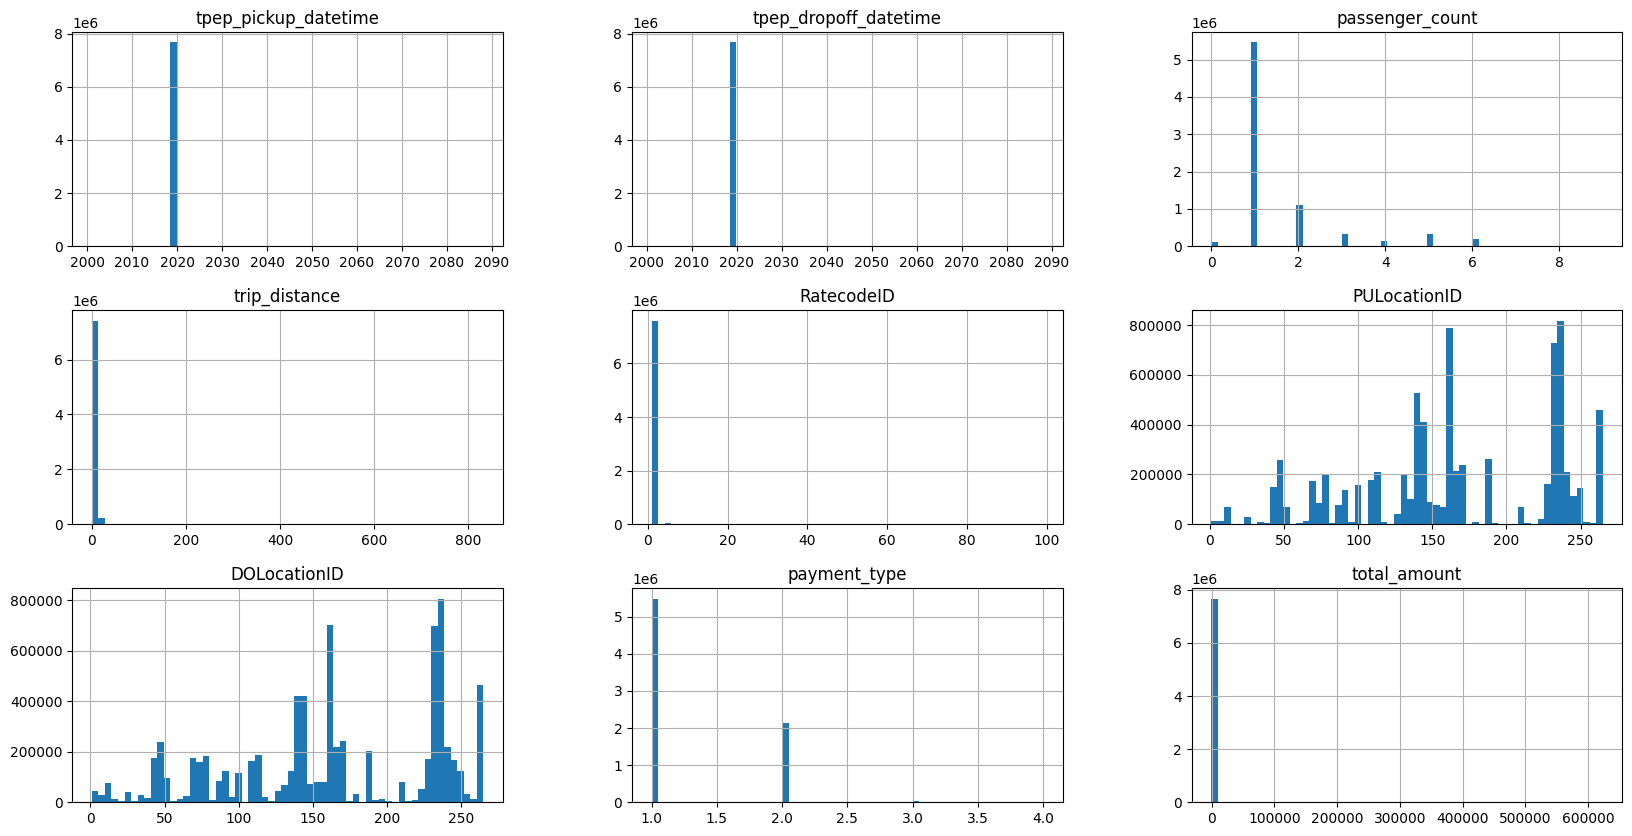

In [89]:
taxi_db.hist(figsize=(20,10), bins=60)

<Axes: xlabel='index', ylabel='total_amount'>

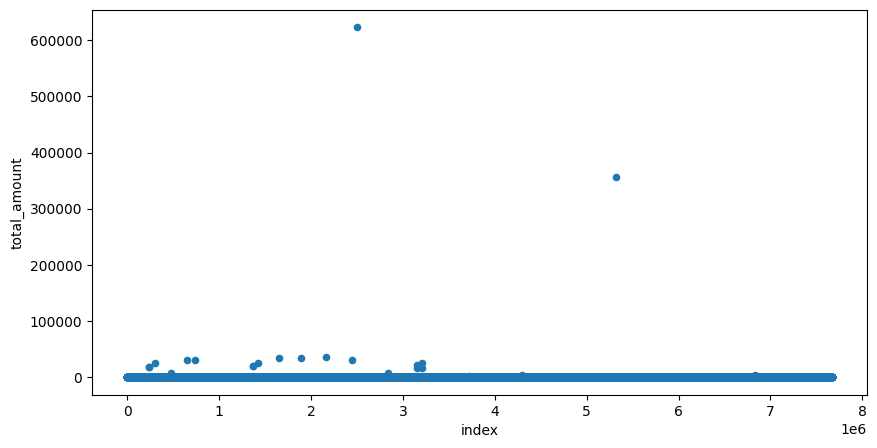

In [31]:
taxi_db.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

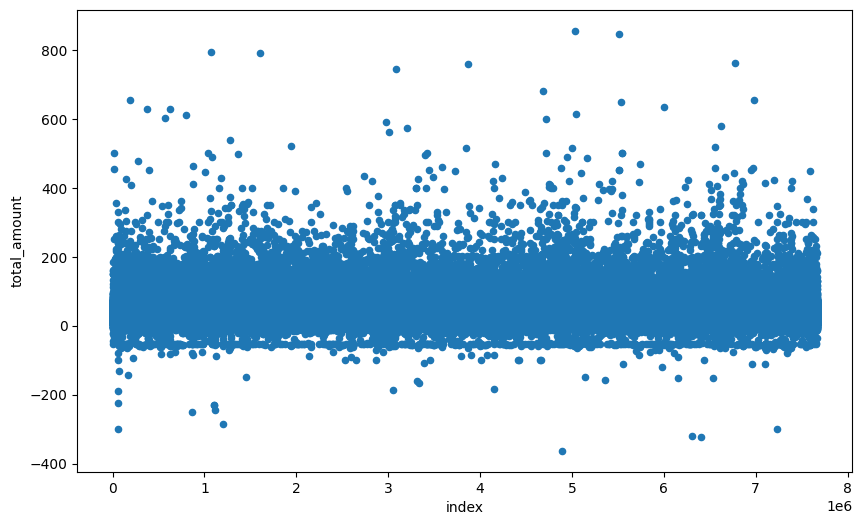

In [32]:
taxi_db[taxi_db['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,6))

<Axes: xlabel='index', ylabel='total_amount'>

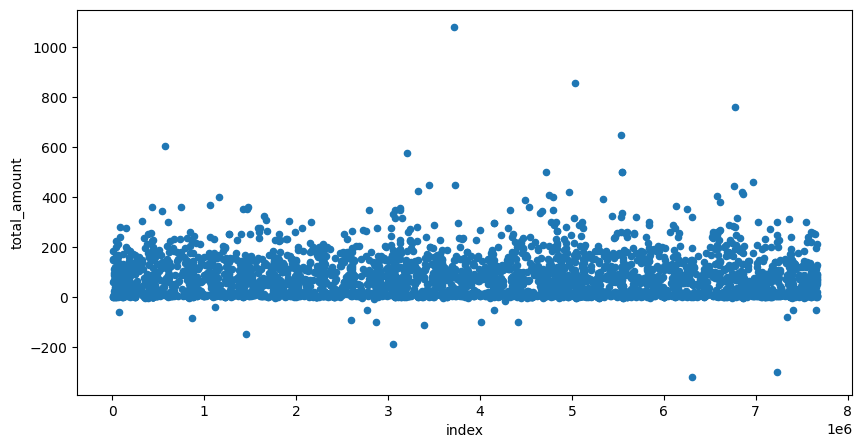

In [33]:
# in PULocation the numbers 264 and 265 are unkown areas and outside newyork
taxi_db[taxi_db['PULocationID']==265].reset_index().plot(figsize=(10,5) ,kind='scatter', y='total_amount', x='index')

<Axes: xlabel='index', ylabel='total_amount'>

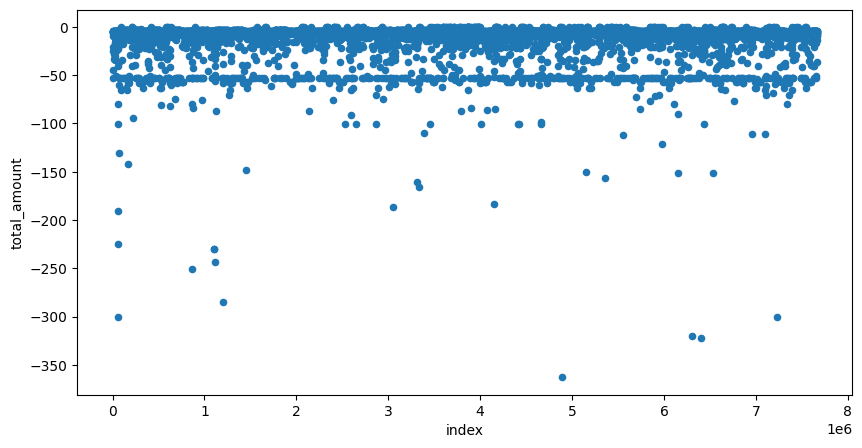

In [34]:
#check if there are amounts in negative
taxi_db[taxi_db['total_amount']<0].reset_index().plot(figsize=(10,5) ,kind='scatter', y='total_amount', x='index')

In [35]:
taxi_db['RatecodeID'].value_counts()

,count
RatecodeID,
1.0,7430288
2.0,166093
5.0,54570
3.0,11801
4.0,4895
99.0,252
6.0,46


In [36]:
print(taxi_db[taxi_db['total_amount']<0].shape)

(7127, 9)


In [37]:
print(taxi_db[taxi_db['PULocationID']==265].shape)
print(taxi_db[taxi_db['DOLocationID']==265].shape)

(3871, 9)
(16817, 9)


In [38]:
taxi_db[taxi_db['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3


In [39]:
# try to understand the relationship between the negative values and payment method
taxi_db[taxi_db['total_amount']<0]['payment_type'].value_counts()

,count
payment_type,
3,4083
4,2667
2,376
1,1


In [40]:
taxi_db[taxi_db['total_amount']==0].shape
taxi_db[taxi_db['total_amount']==0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


In [122]:
taxi_db_prepared = taxi_db.copy()

# Cleaning The Data

In [123]:
# #remove all of unkown areas and outside NYC
taxi_db_prepared =taxi_db_prepared[taxi_db_prepared['PULocationID']<264]
taxi_db_prepared =taxi_db_prepared[taxi_db_prepared['DOLocationID']<264]
taxi_db_prepared.shape

(7480546, 9)

In [124]:
# Eliminate the total amount in negative and bigger than 200$
taxi_db_prepared = taxi_db_prepared[(taxi_db_prepared['total_amount']>=0)&(taxi_db_prepared['total_amount']<200)]
taxi_db_prepared.dtypes


,0
tpep_pickup_datetime,datetime64[us]
tpep_dropoff_datetime,datetime64[us]
passenger_count,float64
trip_distance,float64
RatecodeID,float64
PULocationID,int64
DOLocationID,int64
payment_type,int64
total_amount,float64


# Feature Engineering

In [125]:
# try to import new feature
# trip_distance_min = dropoff_time - pickup_time
taxi_db_prepared['trip_duration_min'] = (
    (taxi_db_prepared['tpep_dropoff_datetime'] -taxi_db_prepared['tpep_pickup_datetime']).dt.total_seconds()/60
)

taxi_db_prepared['trip_duration_min'] = taxi_db_prepared['trip_duration_min'].round(2)
print(taxi_db_prepared[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration_min']].head())
taxi_db_prepared.shape

  tpep_pickup_datetime tpep_dropoff_datetime  trip_duration_min
0  2019-01-01 00:46:40   2019-01-01 00:53:20               6.67
1  2019-01-01 00:59:47   2019-01-01 01:18:59              19.20
2  2018-12-21 13:48:30   2018-12-21 13:52:40               4.17
3  2018-11-28 15:52:25   2018-11-28 15:55:45               3.33
4  2018-11-28 15:56:57   2018-11-28 15:58:33               1.60


(7473604, 10)

In [133]:
# seprate the tpep_pickup_datetime columns to single columns (year, month, day, hour)
taxi_db_prepared['transiction_year'] = taxi_db_prepared['tpep_pickup_datetime'].dt.year
taxi_db_prepared['transiction_month'] = taxi_db_prepared['tpep_pickup_datetime'].dt.month
taxi_db_prepared['transiction_day'] = taxi_db_prepared['tpep_pickup_datetime'].dt.day
taxi_db_prepared['transiction_hour'] = taxi_db_prepared['tpep_pickup_datetime'].dt.hour
taxi_db_prepared['transiction_min'] = taxi_db_prepared['tpep_pickup_datetime'].dt.minute
taxi_db_prepared['is_weekend'] = taxi_db_prepared['tpep_pickup_datetime'].dt.weekday >= 5
taxi_db_prepared['transiction_date'] = taxi_db_prepared['tpep_pickup_datetime'].dt.normalize()

taxi_db_prepared['floathours'] = taxi_db_prepared['transiction_hour'] + taxi_db_prepared['transiction_min'] / 60
taxi_db_prepared['x_circ']=np.sin(2.*np.pi*taxi_db_prepared['floathours']/24.)
taxi_db_prepared['y_circ']=np.cos(2.*np.pi*taxi_db_prepared['floathours']/24.)

In [134]:
taxi_db_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,trip_duration_min,transiction_year,transiction_month,transiction_day,transiction_hour,transiction_min,is_weekend,transiction_date,floathours,x_circ,y_circ
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95,6.67,2019,1,1,0,46,False,2019-01-01,0.766667,0.199368,0.979925
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30,19.20,2019,1,1,0,59,False,2019-01-01,0.983333,0.254602,0.967046
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80,4.17,2018,12,21,13,48,False,2018-12-21,13.800000,-0.453990,-0.891007
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55,3.33,2018,11,28,15,52,False,2018-11-28,15.866667,-0.848048,-0.529919
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55,1.60,2018,11,28,15,56,False,2018-11-28,15.933333,-0.857167,-0.515038


In [135]:
#Eliminate all years except jan 2019
taxi_db_prepared = taxi_db_prepared[taxi_db_prepared['transiction_year'] == 2019]
taxi_db_prepared = taxi_db_prepared[taxi_db_prepared['transiction_month'] == 1]

In [136]:

categioral_columns = ['PULocationID','transiction_month','transiction_day', 'x_circ','y_circ']

numerical_columns = ['trip_distance']
target = 'total_amount'
taxi_db_prepared = taxi_db_prepared[categioral_columns+numerical_columns+[target]].copy()



In [137]:
taxi_aggregated_db =taxi_db_prepared.groupby(categioral_columns).mean().reset_index()
taxi_aggregated_db['count_of_tranication'] = taxi_aggregated_db.groupby(categioral_columns).count().reset_index()['total_amount']
taxi_aggregated_db.head()

,PULocationID,transiction_month,transiction_day,x_circ,y_circ,trip_distance,total_amount,count_of_tranication
0,1,1,1,-0.978148,-0.207912,0.00,105.50,1
1,1,1,1,-0.944089,0.329691,0.00,88.30,1
2,1,1,1,-0.892979,0.450098,0.11,142.36,1
3,1,1,1,-0.774393,-0.632705,41.28,118.32,1
4,1,1,1,-0.743145,0.669131,0.00,120.30,1


In [138]:
x = taxi_aggregated_db.drop(columns=[target])
y = taxi_aggregated_db[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# for col in categioral_columns:
#   taxi_aggregated_db[col] = taxi_aggregated_db[col].astype('category')


In [139]:
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (1319895, 7)
x_test (650099, 7)
y_train (1319895,)
y_test (650099,)


In [140]:
print(taxi_aggregated_db.shape)
x_train.head()

(1969994, 8)


,PULocationID,transiction_month,transiction_day,x_circ,y_circ,trip_distance,count_of_tranication
994221,148,1,17,-0.555570,-0.831470,1.260000,1
619377,114,1,9,-0.915311,-0.402747,1.400000,1
823163,140,1,28,-0.972370,0.233445,1.268333,1
166681,45,1,28,-0.026177,-0.999657,0.600000,1
993636,148,1,16,0.422618,-0.906308,0.970000,1


In [141]:
y_train.head()

,total_amount
994221,9.300000
619377,12.950000
823163,10.733333
166681,6.600000
993636,9.800000


In [51]:
# calculate the mean of trip_duration

# road_duration_map = (
#     x_train.groupby(['PULocationID', 'DOLocationID'])['trip_duration_min'].mean().reset_index(name='est_duration')
# )


# df_encoded.head()


In [100]:
print(taxi_aggregated_db.shape)
taxi_aggregated_db.head()


(100721, 6)


,PULocationID,transiction_day,transiction_hour,trip_distance,total_amount,count_of_tranication
0,1,1,2,0.0,21.800,1
1,1,1,5,0.0,87.300,1
2,1,1,6,0.0,80.300,1
3,1,1,8,0.0,128.580,1
4,1,1,10,16.9,43.245,1


In [69]:
print(taxi_aggregated_db.shape)

(100721, 6)


In [70]:
taxi_aggregated_db.describe()

,trip_distance,total_amount,count_of_tranication
count,100721.000000,100721.000000,100721.0
mean,4.686003,21.189707,1.0
std,4.468588,15.533761,0.0
min,0.000000,0.000000,1.0
25%,2.030000,12.329412,1.0
50%,2.917778,15.153043,1.0
75%,5.442000,23.772727,1.0
max,50.070000,193.560000,1.0


<Axes: >

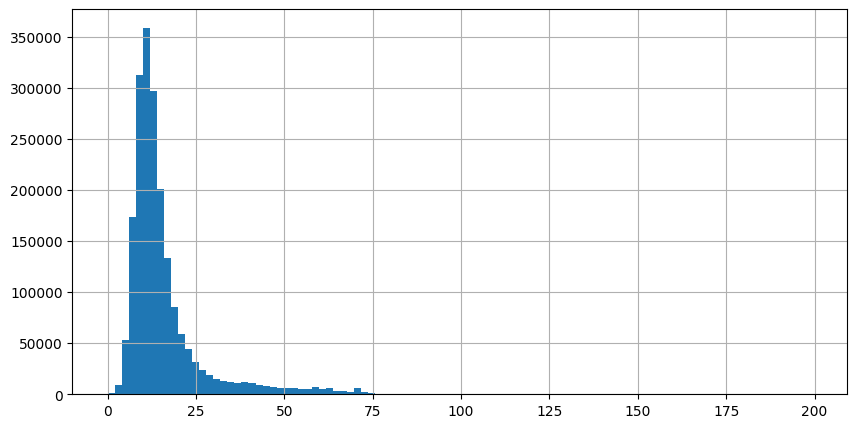

In [142]:
taxi_aggregated_db['total_amount'].hist(bins=100, figsize=(10,5))


<Axes: >

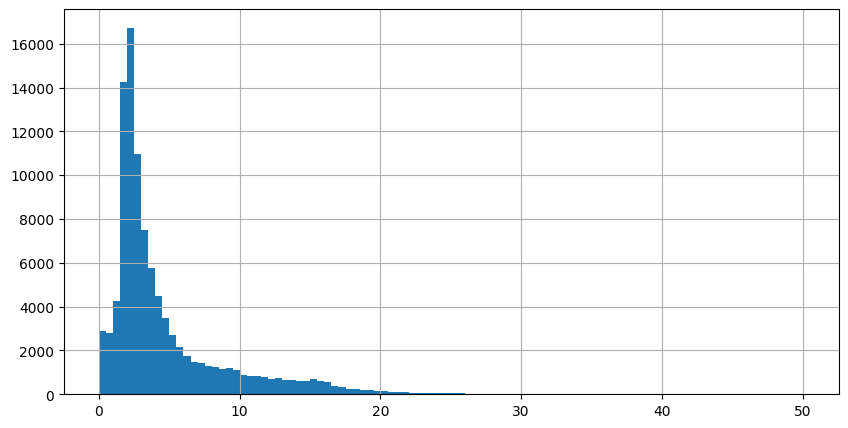

In [57]:
taxi_aggregated_db['trip_distance'].hist(bins=100, figsize=(10,5))

In [143]:

tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=10)
tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=10)

In [144]:
model_at_hand = tree

y_pred = model_at_hand.predict(x_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('mean_absolute_error',mean_absolute_error(y_test,y_pred))
print('mean_squared_error',mean_squared_error(y_test,y_pred))
print('sqrt',sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score',r2_score(y_test, y_pred))

mean_absolute_error 1.8467253857481662
mean_squared_error 18.59482125721072
sqrt 4.312171292656488
r2_score 0.8613459201125439


In [ ]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     "max_depth" :[5,10,15,20],
#     "min_samples_leaf" : [1,5,10]
# }

# grid = GridSearchCV(DecisionTreeRegressor(), param_grid=params, cv=3)
# grid.fit(x_train,y_train)

# print("Best parameters:", grid.best_params_)

In [ ]:

x_sample = x_train.sample(300000,  random_state=42)
y_sample = y_train.loc[x_sample.index]
y_sample = y_sample.values.ravel()
# rf = RandomForestRegressor(max_depth=15, n_estimators=500,random_state=0 ,n_jobs=-1 )
# rf.fit(x_sample,y_sample)

# y_pred_rf = rf.predict(x_test)

# print(r2_score(y_test, y_pred_rf))

In [145]:


# تدريب النموذج على كامل بيانات التدريب
hgb = HistGradientBoostingRegressor(
    max_iter=200,        # عدد التكرارات (مثل عدد الأشجار)
    max_depth=5,         # عمق الشجرة للحد من الأوفر فيتنق
    learning_rate=0.1,   # معدل التعلم
    random_state=0
)

# تدريب النموذج
hgb.fit(x_train, y_train)

# التنبؤ
y_pred_hgb = hgb.predict(x_test)
y_train_pred = hgb.predict(x_train)

# التقييم
r2 = r2_score(y_test, y_pred_hgb)
mae = mean_absolute_error(y_test, y_pred_hgb)
mse = mean_squared_error(y_test, y_pred_hgb)
rmse = np.sqrt(mse)

print(f"✅ R² score       : {r2}")
print(f"📉 MAE            : {mae}")
print(f"📉 MSE            : {mse}")
print(f"📉 RMSE           : {rmse}")

train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f"🎯 Training R²     : {train_r2}")
print(f"🎯 Training RMSE   : {train_rmse}")

✅ R² score       : 0.874211989879901
📉 MAE            : 1.7346794464509545
📉 MSE            : 16.86935982253098
📉 RMSE           : 4.107232623376838
🎯 Training R²     : 0.8779937014358449
🎯 Training RMSE   : 4.031938775812708



## **Learning curve** to check if there is an **overfiting**

In [ ]:


train_sizes, train_scores, test_scores = learning_curve(
    hgb, x_train, y_train,
    cv =5 ,
    scoring = 'r2',
    train_sizes = np.linspace(0.1,1.0,10),
    n_jobs=-1,
    random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10,6 ))
plt.plot(train_sizes, train_scores_mean, '-o' , color='blue',label='Training score')
plt.plot(train_sizes, test_scores_mean, '-o' , color='green',label='Cross-validation score')
plt.title('Learning Curve for HistGradientBoostingRegressor')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

**TO CHECK IF THERE IS A DATA LEKAGE**

---

training very small slice of data


In [105]:
x_small_slice = x_train.sample(500, random_state=42)
y_small_slice = y_train.loc[x_small_slice.index]
y_small_slice = y_small_slice.values.ravel()

x_test_sample = x_test.sample(500, random_state = 0)
y_test_sample = y_test.loc[x_test_sample.index]



# تدريب النموذج على كامل بيانات التدريب
hgb = HistGradientBoostingRegressor(
    max_iter=200,        # عدد التكرارات (مثل عدد الأشجار)
    max_depth=5,         # عمق الشجرة للحد من الأوفر فيتنق
    learning_rate=0.1,   # معدل التعلم
    random_state=0
)

# تدريب النموذج
hgb.fit(x_small_slice, y_small_slice)
# التنبؤ
y_pred_hgb = hgb.predict(x_test_sample)
y_train_pred = hgb.predict(x_small_slice)

# التقييم
r2 = r2_score(y_test_sample, y_pred_hgb)
mae = mean_absolute_error(y_test_sample, y_pred_hgb)
mse = mean_squared_error(y_test_sample, y_pred_hgb)
rmse = np.sqrt(mse)

print(f"✅ R² score       : {r2}")
print(f"📉 MAE            : {mae}")
print(f"📉 MSE            : {mse}")
print(f"📉 RMSE           : {rmse}")

train_r2 = r2_score(y_small_slice, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_small_slice, y_train_pred))

print(f"🎯 Training R²     : {train_r2}")
print(f"🎯 Training RMSE   : {train_rmse}")


✅ R² score       : 0.7920028469928009
📉 MAE            : 4.10782282419356
📉 MSE            : 44.67392131965558
📉 RMSE           : 6.683855273691642
🎯 Training R²     : 0.8807310209639456
🎯 Training RMSE   : 5.572495991921635
